In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.set_printoptions(precision=2)
pd.set_option('precision', 2)
np.set_printoptions(suppress=True)
sns.set(style='whitegrid')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

Number of categorical features : 43
['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


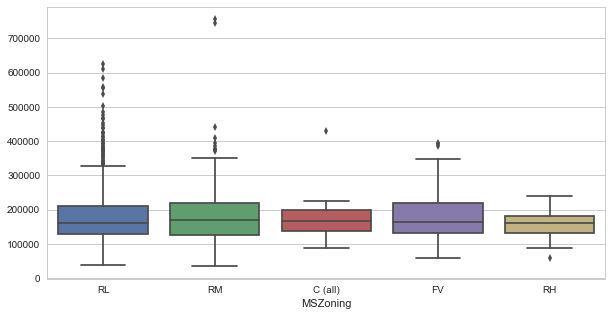

In [2]:
input_path = 'data/train.csv'
iowa_house_data = pd.read_csv(input_path, index_col='Id')
target = iowa_house_data.iloc[:,-1].values

categorical_features = iowa_house_data.select_dtypes(exclude=[np.number])
print('Number of categorical features : ' + str(categorical_features.columns.values.size))
print(categorical_features.columns.values)

'''1. MSZoning - Identifies the general zoning classification such as 
    Agriculture, Residential, Commercial of the sale.
    INFERENCES:
        1. Median of different values remained same.
        2. All categories have 50% of values in IQR (Q3 - Q1) 
        3. Most outliers are in Residential Low Density.
        4. There is some skweness in RL, FV & RH categories
        5. IGNORE this feature as most observations across categories fall in a range
           & saleprice is NOT MUCH IMPACTED by different values of MSZoning.
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'MSZoning', y = target, data = categorical_features)

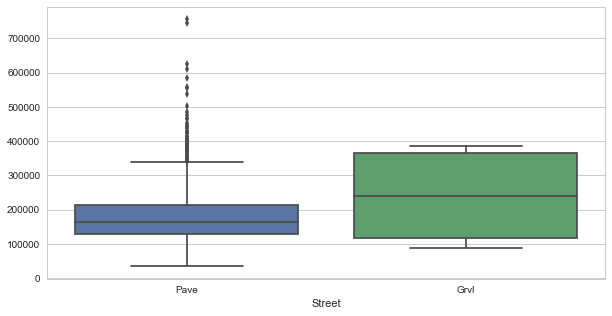

In [3]:
'''2. Street - Type of road access to property i.e. Gravel or Paved.
    INFERENCES:
        1. Gravel type seems to fetch more SalePrice than Paved type.
        2. Some skewness in Paved type.
        3. CONSIDER THIS feature.
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'Street', y = target, data = categorical_features)

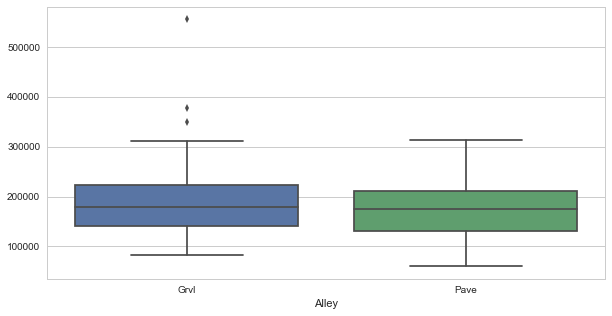

In [4]:
'''3. Alley - Type of alley access to property i.e. Gravel or Paved or No alley access.
    INFERENCES:
        1. Median & distribution of data for different Alley types remains closely
           same.
        2. Some skewness in Paved type.
        3. IGNORE THIS feature.
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'Alley', y = target, data = categorical_features)

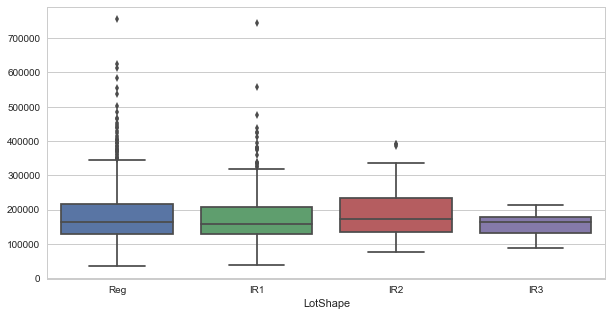

In [5]:
'''4. LotShape - General shape of property i.e. Regular or Slightly irregular or Irregular.
    INFERENCES:
        1. Median & distribution of data for different LotShape types remains 
        closely same.
        2. Skewness in all types but ignored as this feature is not considered in 
        model.
        3. IGNORE THIS feature.
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'LotShape', y = target, data = categorical_features)

In [ ]:
'''5. LandContour - Flatness of the property i.e. Flat/Banked/Hillside.
    INFERENCES:
        1. Median & distribution of data for different LandContour types remains 
        closely same.
        2. Skewness in all types (except Hillside) but ignored as this feature is not considered in 
        model.
        3. IGNORE THIS feature.
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'LandContour', y = target, data = categorical_features)

In [ ]:
'''6. Utilities - Type of utilities available i.e. All(E,G,W,& S)/NoSewr/NoSeWa/ELO.
    INFERENCES:
        1. No much variability. Most houses seems to have all utilities available.
        2. IGNORE THIS feature.
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'Utilities', y = target, data = categorical_features)
all_util_df = categorical_features.loc[categorical_features['Utilities'] == 'AllPub']
print('Total Observations : ' + str(categorical_features.shape[0]))
print('Observations with All public utilities : ' + str(all_util_df.shape[0]))

In [ ]:
'''7. LotConfig - Lot configuration i.e. Inside/Corner/CulDSac etc.
    INFERENCES:
        1. Median & distribution of data for different LotConfig types remains 
        closely same.
        2. IGNORE THIS feature.
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'LotConfig', y = target, data = categorical_features)

In [ ]:
'''8. LandSlope - Slope of property i.e. Gtl/Mod/Sev.
    INFERENCES:
        1. Median & distribution of data for different LandSlope types remains 
        closely same.
        2. Skweness in data.
        3. IGNORE THIS feature.
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'LandSlope', y = target, data = categorical_features)

In [ ]:
'''9. Neighborhood - Physical locations within limits.
    INFERENCES:
        1. Lot of variablity in SalePrice across different Neighbourhoods.
        2. Try figsize=(20,15)
        3. CONSIDER THIS feature.
'''
plt.subplots(figsize=(20,5))
sns.boxplot(x = 'Neighborhood', y = target, data = categorical_features)

In [ ]:
'''10. Condition1 - Proximity to various conditions.
    INFERENCES:
        1. Variablity is observed in SalePrice across different Condition1.
        2. CONSIDER THIS feature.
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'Condition1', y = target, data = categorical_features)

In [ ]:
'''11. Condition2 - Proximity to various conditions.
    INFERENCES:
        1. Some values dont have data. Rest of observations across different values
        dont have much difference in SalePrice
        2. IGNORE THIS feature.
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'Condition2', y = target, data = categorical_features)

In [ ]:
'''12. BldgType - Type of dwelling i.e. Single-family/Duplex/Townhouse
    INFERENCES:
        1. Medians across different values remained close.
        2. IGNORE THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'BldgType', y = target, data = categorical_features)

In [ ]:
'''13. HouseStyle - Style of dwelling i.e. One story/Two story etc.
    INFERENCES:
        1. Medians across different values remained close.
        2. IGNORE THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'HouseStyle', y = target, data = categorical_features)

In [ ]:
'''14. RoofStyle - Type of roof i.e. Flat/Gable etc.
    INFERENCES:
        1. Variability is observed.
        2. CONSIDER THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'RoofStyle', y = target, data = categorical_features)

In [ ]:
'''15. RoofMatl - Roof material i.e. Metal/Roll etc.
    INFERENCES:
        1. Some values dont have data. Rest of observations across different values
        dont have much difference in SalePrice.
        2. IGNORE THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'RoofMatl', y = target, data = categorical_features)

In [ ]:
'''16. Exterior1st - Exterior covering on house i.e. Asbestos/Brick etc.
    INFERENCES:
        1. Medians across different values remained close..
        2. IGNORE THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'Exterior1st', y = target, data = categorical_features)

In [ ]:
'''17. Exterior2nd - Exterior covering on house i.e. Asbestos/Brick etc.
    INFERENCES:
        1. Medians across different values remained close..
        2. IGNORE THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'Exterior2nd', y = target, data = categorical_features)

In [ ]:
'''18. MasVnrType - Masonry veneer type i.e. Brick/Stone etc.
    INFERENCES:
        1. Medians across different values remained close..
        2. IGNORE THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'MasVnrType', y = target, data = categorical_features)

In [ ]:
'''19. ExterQual - Evaluates the quality of the material on the exterior 
                   i.e. Excellent/Good etc.
    INFERENCES:
        1. Medians across different values remained close..
        2. IGNORE THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'ExterQual', y = target, data = categorical_features)

In [ ]:
'''20. ExterCond - Evaluates the present condition of the material on the exterior 
                   i.e. Excellent/Good etc.
    INFERENCES:
        1. Medians across different values remained close.
        2. IGNORE THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'ExterCond', y = target, data = categorical_features)

In [ ]:
'''21. Foundation - Type of foundation i.e. Brick/Wood etc.
    INFERENCES:
        1. Variablility is observed in SalePrice.
        2. CONSIDER THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'Foundation', y = target, data = categorical_features)

In [ ]:
'''22. BsmtQual - Evaluates the height of the basement.
    INFERENCES:
        1. Medians across different values remained close.
        2. IGNORE THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'BsmtQual', y = target, data = categorical_features)

In [ ]:
'''23. BsmtCond - Evaluates the condition of the basement.
    INFERENCES:
        1. Some variability is observed in SaleProce.
        2. CONSIDER THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'BsmtCond', y = target, data = categorical_features)

In [ ]:
'''24. BsmtExposure - Refers to walkout or garden level walls.
    INFERENCES:
        1. Medians across different values remain close.
        2. IGNORE THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'BsmtExposure', y = target, data = categorical_features)

In [ ]:
'''25. BsmtFinType1 - Rating of basement finished area.
    INFERENCES:
        1. Medians across different values remain close.
        2. IGNORE THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'BsmtFinType1', y = target, data = categorical_features)

In [ ]:
'''26. BsmtFinType2 - Rating of basement finished area.
    INFERENCES:
        1. Variability is observed.
        2. CONSIDER THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'BsmtFinType2', y = target, data = categorical_features)

In [ ]:
'''27. Heating - Type of heating i.e. Floor Furnace/Wall furnace/Gas.
    INFERENCES:
        1. Variability is observed.
        2. CONSIDER THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'Heating', y = target, data = categorical_features)

In [ ]:
'''28. HeatingQC - Heating quality and condition i.e. Excellent/Excellent etc.
    INFERENCES:
        1. NO Variability is observed.
        2. IGNORE THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'HeatingQC', y = target, data = categorical_features)

In [ ]:
'''29. CentralAir - Central air conditioning i.e. YES/NO.
    INFERENCES:
        1. NO Variability is observed.
        2. IGNORE THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'CentralAir', y = target, data = categorical_features)

In [ ]:
'''30. Electrical - Electrical system.
    INFERENCES:
        1. varience is observed.
        2. CONSIDER THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'Electrical', y = target, data = categorical_features)

In [ ]:
'''31. KitchenQual - Kitchen quality.
    INFERENCES:
        1. Not NUCH varience is observed.
        2. IGNORE THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'KitchenQual', y = target, data = categorical_features)

In [ ]:
'''32. Functional - Home functionality.
    INFERENCES:
        1. varience is observed.
        2. CONSIDER THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'Functional', y = target, data = categorical_features)

In [ ]:
'''33. FireplaceQu - Fireplace quality.
    INFERENCES:
        1. varience is observed.
        2. CONSIDER THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'FireplaceQu', y = target, data = categorical_features, hue='Heating')

In [ ]:
'''34. GarageType - Garage location.
    INFERENCES:
        1. varience is observed.
        2. CONSIDER THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'GarageType', y = target, data = categorical_features)

In [ ]:
'''35. GarageFinish - Interior finish of the garage.
    INFERENCES:
        1. Not MUCH varience is observed.
        2. IGNORE THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'GarageFinish', y = target, data = categorical_features)

In [ ]:
'''36. GarageQual - Garage quality.
    INFERENCES:
        1. varience is observed.
        2. CONSIDER THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'GarageQual', y = target, data = categorical_features)

In [ ]:
'''37. GarageCond - Garage condition.
    INFERENCES:
        1. varience is observed.
        2. CONSIDER THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'GarageCond', y = target, data = categorical_features)

In [ ]:
'''38. PavedDrive - Paved driveway.
    INFERENCES:
        1. Not MUCH varience is observed.
        2. IGNORE THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'PavedDrive', y = target, data = categorical_features)

In [ ]:
'''39. PoolQC - Pool quality.
    INFERENCES:
        1. varience is observed.
        2. CONSIDER THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'PoolQC', y = target, data = categorical_features)

In [ ]:
'''40. Fence - Fence quality.
    INFERENCES:
        1. varience is observed.
        2. Skewed
        3. CONSIDER THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'Fence', y = target, data = categorical_features)

In [ ]:
'''41. MiscFeature - Miscellaneous feature.
    INFERENCES:
        1. varience is observed.
        2. CONSIDER THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'MiscFeature', y = target, data = categorical_features)

In [ ]:
'''42. SaleType - Type of sale.
    INFERENCES:
        1. varience is observed.
        2. CONSIDER THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'SaleType', y = target, data = categorical_features)

In [ ]:
'''43. SaleCondition - Condition of sale.
    INFERENCES:
        1. varience is observed.
        2. CONSIDER THIS feature
        
'''
plt.subplots(figsize=(10,5))
sns.boxplot(x = 'SaleCondition', y = target, data = categorical_features)

In [ ]:
'''
Observations:
    1. Heating & FireplaceQu : There seems to be a relation between 
    Heating & FireplaceQu. From Hue blox plot, seems it is better to 
    go with FireplaceQu.
    2. BsmtCond & BsmtFinType2 : Of these 2, BsmtFinType2 shows more variance than
    BsmtCond. So, choose BsmtFinType2.
    3. GarageType & GarageQual & GarageCond : All infers same metric. Choose based
    on missing values. Even missing values are same for GarageCond & GarageQual.
    So, choose GarageQual as it showed more variance with SalePrice.
    4. SaleType & SaleCondition : SaleType shows more variance than SaleCondition. 
    So, choose SaleType.
    
'''
garage_df = categorical_features[['GarageQual', 'GarageCond']]
null_columns=garage_df.columns[garage_df.isnull().any()]
missing_ratio = (garage_df[null_columns].isnull().sum()/len(garage_df)) * 100
missing_data = pd.DataFrame({'Missing Ratio' :missing_ratio})
print(missing_data.sort_values(by='Missing Ratio',ascending=False))

'''
Finally, selected 14 features from 43 categorical features. refer analysis.
Street, Neighborhood, Condition1, Foundation, BsmtFinType2, 
Electrical, Functional, FireplaceQu, GarageQual, PoolQC, 
Fence, MiscFeature, SaleType, RoofStyle
'''